In [ ]:
from TO_sim.Animation import *
from TO_sim.To_Draw import *
from TO_sim.Hysteresis_Kuramoto import *
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.Utility import *
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
t_end = 500
m = 6
N = 5000
dist = "Quantile Lorentzian"
dK = 0.2
dt = 0.1
Ksdf,Ksrdf = Hysteresis_pd(m,N=N,dK=dK,t_end=t_end,dist=dist,dt=dt,seed="Uniform")

In [ ]:
Time_R_df_total(Ksdf,Ksrdf,N,m,save=True,Folder_name="Review/Review5/",mean_time=50)

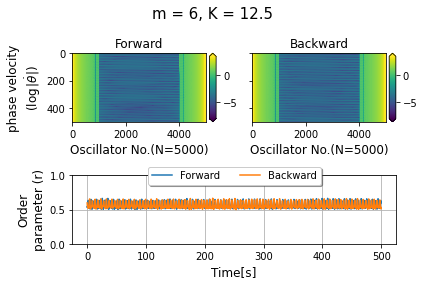

In [43]:
ani = Animation_logabs(Ksdf,Ksrdf,N,m)
HTML(ani.to_jshtml())

In [ ]:
Check_K,To_animate = Make_to_animate(Ksrdf,[[7.7,100,499.9]],time_interval=10)

In [ ]:
ani = ddtheta_animation(Ksdf,To_animate,Check_K,m)

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
ani.save(f'Review/Review5/Animation/phase acc. m={m},N={N},K={Check_K}.mp4',dpi=400)

In [ ]:
ani.save(f'Review/Review5/Animation/phase Total m={m},N={N},K={Check_K}.mp4',dpi=400)


In [ ]:
C_K = Ksdf.index
omega = Ksdf["Omega"].iloc[0]

Float64Index([ 7.7,  7.9,  8.1,  8.3,  8.5,  8.7,  8.9,  9.1,  9.3,  9.5,  9.7,
               9.9, 10.1, 10.3, 10.5, 10.7, 10.9, 11.1, 11.3, 11.5, 11.7, 11.9,
              12.1, 12.3, 12.5],
             dtype='float64')

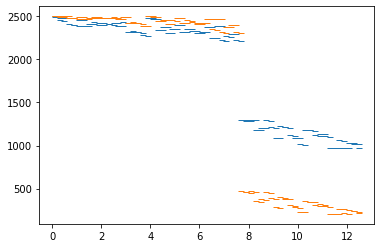

In [29]:
KR = lambda df,K : df['rs'][K]*K
KMR = lambda x,m : (4/np.pi)*np.sqrt(x/m)
O_lset = lambda x:np.searchsorted(omega,-x)
O_rset = lambda x:np.searchsorted(omega,x)
KR_ = KR(Ksdf,C_K)
KMR_ = KR_.apply(KMR,m=m)
KR_lidx = KR_.apply(O_lset)
KR_ridx = KR_.apply(O_rset)

KMR_lidx = KMR_.apply(O_lset)
KMR_ridx = KMR_.apply(O_rset)


KR__ = np.concatenate([kr_ for kr_ in KR_])
KMR__ = np.concatenate([kr_ for kr_ in KMR_])

KR_u = np.searchsorted(omega,KR__)
KR_d = np.searchsorted(omega,-KR__)

KMR_u = np.searchsorted(omega,KMR__)
KMR_d = np.searchsorted(omega,-KMR__)

temp1 = []
temp2 = []
temp3 = []
temp4 = []
for i,_ in enumerate(C_K):
    temp_1  = KMR_lidx[C_K[i]][0]
    temp_2  = KMR_lidx[C_K[i]][-1]
    temp_3  = KR_lidx[C_K[i]][0]
    temp_4  = KR_lidx[C_K[i]][-1]
    temp1.append(temp_1)
    temp2.append(temp_2)
    temp3.append(temp_3)
    temp4.append(temp_4)
# print(*temp1)
# print(*temp2)
To_array  =  lambda  x:  np.array(x)
temp1,temp2,temp3,temp4  =  map(To_array,(temp1,temp2,temp3,temp4))
# plt.plot(Check_K,temp1)
plt.plot(C_K,temp1,'_',color = 'tab:blue')
plt.plot(C_K,temp2,'_',color = 'tab:blue')
# plt.plot(Check_K,temp3)
plt.plot(C_K,temp3,'_',color = 'tab:orange')
plt.plot(C_K,temp4,'_',color = 'tab:orange')
C_K[temp1>temp3]
C_K[temp2>temp4]

In [40]:
larger = lambda x,a,b: a[x]>b[x]
A = np.array([sum(KMR_lidx[K_]>KR_lidx[K_]) for K_ in C_K])
# list(map(larger,C_K,KMR_lidx,KR_lidx))
# larger(C_K,KMR_lidx,KR_lidx)
# list(map(larger,KMR_lidx,KR_lidx))

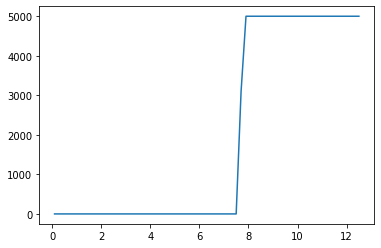

In [41]:
plt.plot(C_K,A)

In [42]:
C_K[A>0]

Float64Index([ 7.7,  7.9,  8.1,  8.3,  8.5,  8.7,  8.9,  9.1,  9.3,  9.5,  9.7,
               9.9, 10.1, 10.3, 10.5, 10.7, 10.9, 11.1, 11.3, 11.5, 11.7, 11.9,
              12.1, 12.3, 12.5],
             dtype='float64')